In [45]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display
import torch, torchaudio

from IPython.display import Video


# %matplotlib widget

In [46]:
def plot_spectrogram(y, sr):
    hop_length = int(4096 * 0.4)
    plt.figure(figsize=(9, 5))
    signal = librosa.stft(y, n_fft=4096, hop_length=hop_length, window='hamming')
    signal = librosa.amplitude_to_db(np.abs(signal) ** 2)
    librosa.display.specshow(signal, sr=sr, hop_length=hop_length , x_axis="time", y_axis='log', cmap='magma')
#     plt.colorbar(format="%+2.f")
    plt.tight_layout()

    
def running_mean(x, n):
    if n % 2 == 0:
        raise ValueError("Filter length is not odd")

    aver = np.convolve(x, np.ones((n,)) / n, mode='same')
    n_half = int((n - 1) / 2)
    corr_length = np.array(range(n_half + 1, n)) / n
    aver[:n_half] = np.divide(aver[:n_half], corr_length)
    aver[-n_half:] = np.divide(aver[-n_half:], corr_length[::-1])

    return aver


def filter_and_normalize(x, filts_len):
    for filt_len in filts_len:
        x = running_mean(x, filt_len)
    
    x -= np.min(x)
    x = x / np.max(x)

    return x


def plot_signal(y, sr, f_min=0, f_max=int(1e8)):
    signal = librosa.stft(y, n_fft=4096, hop_length=int(4096 * 0.4), window='hamming')
    signal = np.abs(signal) ** 2
    
    signal = signal[f_min:f_max].sum(0)
    signal = filter_and_normalize(signal, (11, 5))
    
    x = np.linspace(0, len(y), len(signal))
    y3 = np.interp(range(len(y)), x, signal)
    
#     x_len = 9/60 * (len(y3) / sr)
    fig, ax1 = plt.subplots(figsize=(9, 5))
    ax2 = ax1.twinx()
    
    x = np.arange(len(y3)) / sr
    ax1.plot(x, y, c='g', alpha=0.2)
    ax2.plot(x, y3, c='black')
    
    ax1.set_ylabel('Amplitude')
    ax1.set_xlabel('Time [s]')
    plt.tight_layout()

    
def crop_signal(signal, from_min=1, from_sec=0, till_min=2, till_sec=0):

    convert = lambda m, s: m * 60 + s

    from_time = convert(from_min, from_sec)
    till_time = convert(till_min, till_sec)

    return signal[from_time * sr: till_time * sr]

In [7]:
audio_path = 'data/audio/20190819-Kutna Hora-L4-out-MVI_0040.wav'

y, sr = librosa.load(audio_path, sr=None)

In [8]:
y1 = crop_signal(y, 0, 0, 1, 0)

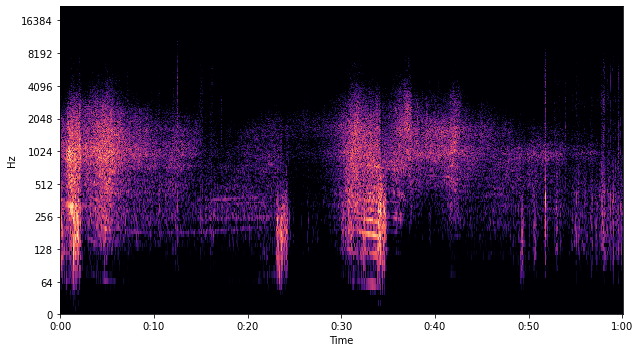

In [9]:
plot_spectrogram(y1, sr)

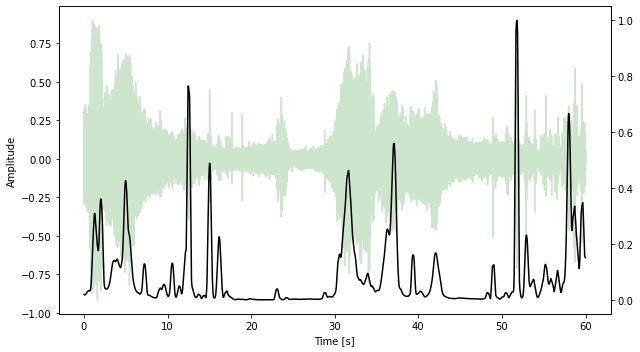

In [10]:
plot_signal(y1, sr, 500)

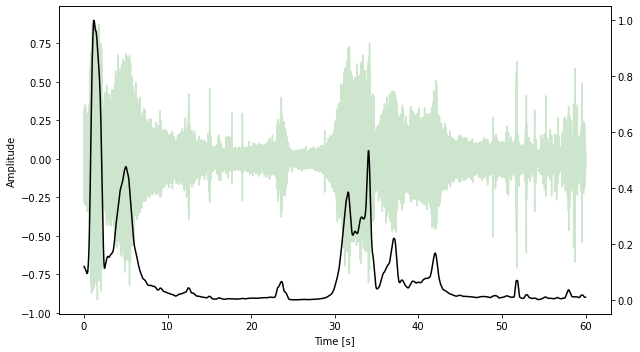

In [11]:
plot_signal(y1, sr, 0)

In [40]:
plt.close('all')

combined = []

# 0 - skip

# 1
secs = [33, 46.5, 49, 53.2]
combined += [np.array(secs) + 60 * 1]

# 2
secs = [9.3, 20.3, 37.3, 49, 53, 54.5]
combined += [np.array(secs) + 60 * 2]

# 3
secs = [5.8, 12.8, 21.4, 46, 48.5, 56.5]
combined += [np.array(secs) + 60 * 3]

# 4
secs = [43.2, 54.6]
combined += [np.array(secs) + 60 * 4]

# 5
secs = [6.3, 14.1, 15.5, 17.3, 18.5, 45.1]
combined += [np.array(secs) + 60 * 5]

# 6
secs = [11.3, 20.2, 21.6, 48.4]
combined += [np.array(secs) + 60 * 6]

# 7
secs = [20.1, 25, 29.6, 41, 45.5, 53.5]
combined += [np.array(secs) + 60 * 7]

# 8
secs = [5.5, 19.8, 19.9, 23.8, 25.3]
combined += [np.array(secs) + 60 * 8]

# 9
secs = [10.9, 16, 21, 31, 40.3, 41.3, 42.9, 46.3, 49.5]
combined += [np.array(secs) + 60 * 9]

# 10
secs = [2.5, 21.5, 24.6]
combined += [np.array(secs) + 60 * 10]

# 11
secs = [54.3]
combined += [np.array(secs) + 60 * 11]

# 12
secs = [8.4, 12.1, 15, 16.6, 18.2, 19.3, 28.3, 28.9, 33.6, 35, 37.8, 39, 40.8, 55.3, 56.6]
combined += [np.array(secs) + 60 * 12]

# 13
secs = [21.5, 51.5, 52.6]
combined += [np.array(secs) + 60 * 13]

# 14
secs = [10.2, 22.5, 23.2, 24.5, 41, 53.6, 54.5]
combined += [np.array(secs) + 60 * 14]

# 15
secs = [2.8, 9.5, 36.5, 45.5, 56.3]
combined += [np.array(secs) + 60 * 15]

# 16
secs = [13.1, 19, 32.2, 33.6, 39.5, 42.3]
combined += [np.array(secs) + 60 * 16]

# 17
secs = [8.2, 10, 39.8, 42.8]
combined += [np.array(secs) + 60 * 17]

# 18
secs = [7.1, 8.5, 10.2, 11.2, 15.5, 34.2, 55.4]
combined += [np.array(secs) + 60 * 18]

# 19
secs = [5.1, 7.3, 8.6, 13.3, 30, 32.5, 57.6, 58.2]
combined += [np.array(secs) + 60 * 19]

# 20
secs = [4.3, 24.5, 26.1, 32, 33.8, 36.7, 38.5, 44, 46.1]
combined += [np.array(secs) + 60 * 20]

# 21
secs = [20.5, 45.0, 46.6, 52.2]
combined += [np.array(secs) + 60 * 21]

# 22
secs = [4.6, 6.8, 8.3, 16.8, 20.6, 39.3, 43.7, 45.9, 59.7]
combined += [np.array(secs) + 60 * 22]

# 23
secs = [11.6, 24.6, 40.3, 45.4, 54.1]
combined += [np.array(secs) + 60 * 23]

# 24
secs = [2.1, 8.5, 9.5, 13.9, 16.2, 22.5, 29.5, 43, 48, 58.3]
combined += [np.array(secs) + 60 * 24]

# 25
secs = [5, 17.4, 18.6, 26.6, 31.2, 53.3]
combined += [np.array(secs) + 60 * 25]

# 26
# secs = []
# combined += [np.array(secs) + 60 * 26]

# 27
secs = [38, 41.8, 43, 47.3, 52.8]
combined += [np.array(secs) + 60 * 27]

# 28
secs = [0.4, 4.5, 28.5, 34.3, 52.4, 55.6]
combined += [np.array(secs) + 60 * 28]

# 29
secs = [8.9, 10.3, 13.3, 16.1, 21.7, 22.7, 31, 32, 33.1, 36.4, 41.1]
combined += [np.array(secs) + 60 * 29]

# 30
secs = [9.5, 37.2, 38.4, 44.2]
combined += [np.array(secs) + 60 * 30]

# 31
secs = [11.4, 15.1, 24.3, 30.2, 35.2]
combined += [np.array(secs) + 60 * 31]

# 32
secs = [8.2, 12.4, 20.5, 26, 28, 30, 38, 41.9, 44, 51.6, 59.2]
combined += [np.array(secs) + 60 * 32]

# 33
secs = [29.4, 36.5]
combined += [np.array(secs) + 60 * 33]

# 34 - skip
# secs = []
# combined += [np.array(secs) + 60 * 34]

secs = []

y1 = crop_signal(y, 33, 0, 35, 0)
plot_signal(y1, sr, 0)

combined = np.concatenate(combined)
# for sec in combined:
for sec in secs:
    plt.vlines(sec, 0, 1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
# np.savetxt('data/labels/20190819-Kutna Hora-L4-out-MVI_0040.txt', combined, fmt='%s')

In [39]:
Video(r"data/video/20190819-Kutna Hora-L4-out-MVI_0040.MP4", width=600)

In [19]:
csv = r'data/csv/20210604_173354_20190819-Kutna Hora-L4-out-MVI_0040.MP4.csv'
csv = np.loadtxt(csv, delimiter=';', skiprows=1, dtype=str)

cars = {}
for row in csv:
    if row[9] != '':
        cars[row[0]] = (row[8], row[9])

### Pytorch

In [27]:
def plot_mel(signal, sr, events=None, events_from=None, events_to=None, n_fft=4096, hop_length=int(4096 * 0.4)):
    
    plt.close('all')
    plt.figure(figsize=(9, 5))
    plt.title(f'Mel features from {int(events_from / 60):02.0f}:{events_from % 60:02.0f} to {int(events_to / 60):02.0f}:{events_to % 60:02.0f}')
    
    signal = crop_signal(signal, 0, events_from, 0, events_to)
    
    features = librosa.feature.melspectrogram(
        signal,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=64
    )
    
    features = librosa.power_to_db(features, ref=np.max)

    if events is not None:
        events = events.copy()
        events -= events_from
        events = events[events < events_to]
        plt.vlines(events, 0, 40000, linewidth=0.5, color='white')
        
    librosa.display.specshow(features, sr=sr, hop_length=hop_length , x_axis="time", y_axis='mel', cmap='magma')
    
    plt.tight_layout()

def plot_mfcc(signal, sr, events=None, events_from=None, events_to=None, n_mfcc=6, delta=None):
    
    plt.close('all')
    plt.figure(figsize=(9, 5))
    plt.title(f'MFCC features from {int(events_from / 60):02.0f}:{events_from % 60:02.0f} to {int(events_to / 60):02.0f}:{events_to % 60:02.0f}')
    
    signal = crop_signal(signal, 0, events_from, 0, events_to)
    
    features = librosa.feature.mfcc(signal, n_mfcc=n_mfcc, sr=sr)
    
    if delta is not None:
        features = librosa.feature.delta(features, order=delta)

    if events is not None:
        events = events.copy()
        events -= events_from
        events = events[events < events_to]
        plt.vlines(events, 0, 40000, linewidth=0.5, color='white')
        
    librosa.display.specshow(features, sr=sr, x_axis="time", cmap='magma')
    
    plt.tight_layout()

In [28]:
audio_path = 'data/audio/20190819-Kutna Hora-L4-out-MVI_0040.wav'
signal, sr = torchaudio.load(audio_path)
signal = signal.mean(0).numpy()

labels_path = 'data/labels/20190819-Kutna Hora-L4-out-MVI_0040.txt'
events = np.loadtxt(labels_path)

In [29]:
minute = 9
events_from = minute * 60
events_to = (minute + 1) * 60 + 30

In [44]:
plot_mel(signal, sr, events, events_from, events_to)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:
plot_mfcc(signal, sr, events, events_from, events_to, n_mfcc=8)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

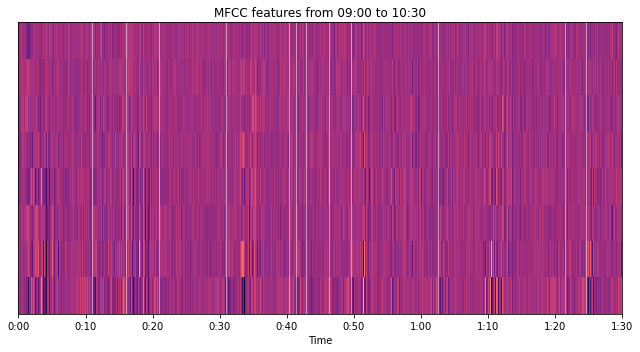

In [32]:
plot_mfcc(signal, sr, events, events_from, events_to, n_mfcc=8, delta=1)

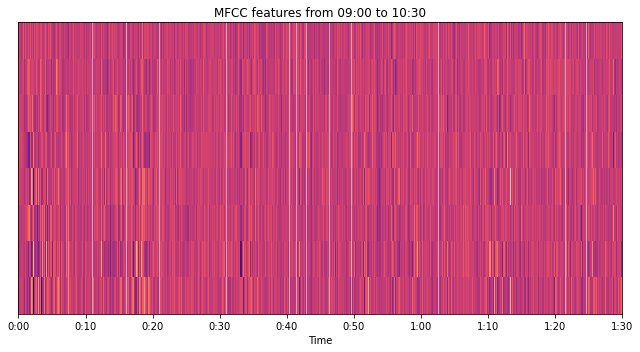

In [33]:
plot_mfcc(signal, sr, events, events_from, events_to, n_mfcc=8, delta=2)